In [42]:
import ccxt
import time
import pandas as pd
import numpy as np
# import arch
import datetime as dt
# from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
# import plotly.express as px

In [31]:
import pandas as pd
import yfinance as yf

# Get the hourly BTC data for the past 100 days
btc_data = yf.download("BTC-USD", start="2023-03-05", end="2023-07-07", interval="1h")

# Create a Pandas DataFrame from the data
df = pd.DataFrame(btc_data)

# Print the first few rows of the DataFrame
# print(df.head())


[*********************100%***********************]  1 of 1 completed


In [32]:
# pd.DataFrame(prices)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-05 00:00:00+00:00,22354.144531,22376.986328,22332.574219,22376.986328,22376.986328,28286976
2023-03-05 01:00:00+00:00,22378.730469,22611.341797,22373.199219,22582.867188,22582.867188,868688896
2023-03-05 02:00:00+00:00,22595.843750,22603.332031,22307.142578,22378.513672,22378.513672,821526528
2023-03-05 03:00:00+00:00,22377.710938,22437.705078,22377.710938,22410.644531,22410.644531,245414912
2023-03-05 04:00:00+00:00,22404.478516,22464.775391,22404.478516,22464.775391,22464.775391,193912832
...,...,...,...,...,...,...
2023-07-06 13:00:00+00:00,30595.457031,30656.947266,30385.835938,30385.835938,30385.835938,138776576
2023-07-06 14:00:00+00:00,30366.953125,30417.560547,29892.226562,30165.876953,30165.876953,1849597952
2023-07-06 15:00:00+00:00,30120.585938,30460.472656,30116.068359,30420.531250,30420.531250,559886336


In [35]:
df['return'] = np.log(df['Close'] / df['Close'].shift(1))

In [34]:
# df['hour'] = df.index.hour

In [36]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,return,hour
Datetime,,,,,,,,
2023-03-05 00:00:00+00:00,22354.144531,22376.986328,22332.574219,22376.986328,22376.986328,28286976,NaN,0
2023-03-05 01:00:00+00:00,22378.730469,22611.341797,22373.199219,22582.867188,22582.867188,868688896,0.009158,1
2023-03-05 02:00:00+00:00,22595.843750,22603.332031,22307.142578,22378.513672,22378.513672,821526528,-0.009090,2
2023-03-05 03:00:00+00:00,22377.710938,22437.705078,22377.710938,22410.644531,22410.644531,245414912,0.001435,3
2023-03-05 04:00:00+00:00,22404.478516,22464.775391,22404.478516,22464.775391,22464.775391,193912832,0.002412,4


In [37]:
# hourly_mean = df[['return']].groupby(df.index.hour).mean()
hourly_vol = df[['return']].groupby(df.index.hour).std() * np.sqrt(365*24) * 100
# hourly_vol

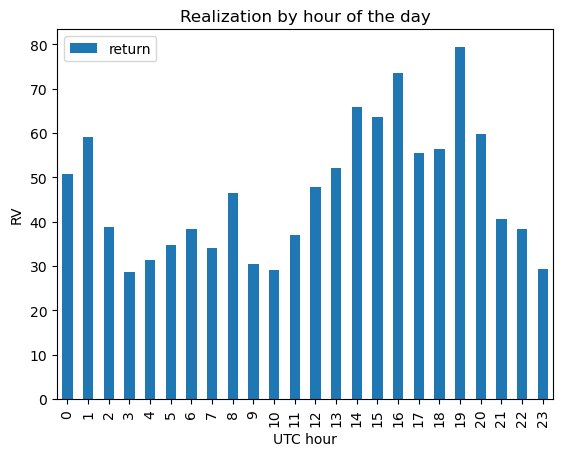

In [41]:
hourly_vol.plot.bar()

# Set labels and title
plt.xlabel('UTC hour')
plt.ylabel('RV')
plt.title('Realization by hour of the day')

# Show the plot
plt.show()